 # Exploring Popular Data Science questions on Stack Exchange

![Stack Exchange](se-logo.png "Stack Exchange")

 # Introduction
 
 The main aim of that project is **to determine the most popular topics among young data scientists** to create online lessons for e-learning platform. Or 
 
  ## what is it that people want to learn about in data science?
 
 The best way to approach that in my opinion is to ask the one who is always asked - a [community of Data science experts](https://datascience.stackexchange.com/).
 
 ## Stack Exchange

Data Science Stack Exchange community is part of a question and answer *website network* called [Stack Exchange](https://stackexchange.com/sites). 
All websites in that network are focused on answers to specific practical problems and employ a reputation award system for its questions and answers. Each post can be upvoted, downvoted and added to favourites. All questions are tagged with their subject areas. Each can have up to 5 tags, since a question might be related to several subjects.

Information on posts on web-sites from Stack Exchange network can be navigated with the help of [Stack Exchange Explorer (SEDE)](https://data.stackexchange.com/datascience/query/new). Any user can write a SQL query and download a csv file. [Data Science Stack Exchange data model](https://i.stack.imgur.com/AyIkW.png) helps to navigate the database.

The most interesting for me table from Data Science Stack Exchange database is *Posts* table.  I'll be focusing my attention on the following most relevant columns:

 - `Id`: An identification number for the post.
 - `PostTypeId`: An identification number for the type of post.
 - `СreationDate`: The date and time of creation of the post.
 - `Score`: The post's score.
 - `ViewCount`: How many times the post was viewed.
 - `Tags`: What tags were used.
 - `AnswerCount`: How many answers the question got (only applicable to question posts).
 - `FavoriteCount`: How many times the question was favored (only applicable to question posts).
 
 I run two SQL queries to find the following:
  - all posts made from 01.01.2019 (query 1)
  - all posts of all the time that website exists (query 2)

### Query 1

SELECT Id, 
      <br> &emsp;&emsp;&emsp;&emsp;PostTypeId,
      <br> &emsp;&emsp;&emsp;&emsp;CreationDate
      <br> &emsp;&emsp;&emsp;&emsp;Score, 
      <br> &emsp;&emsp;&emsp;&emsp;ViewCount, 
      <br> &emsp;&emsp;&emsp;&emsp;Tags, 
      <br> &emsp;&emsp;&emsp;&emsp;AnswerCount, 
      <br> &emsp;&emsp;&emsp;&emsp;FavoriteCount
<br>FROM Posts
<br>WHERE CreationDate >= '2019-01-01 00:00:00' AND PostTypeId = 1;

The resulting csv file was saved as 'recent_questions.csv'.

### Query 2

 SELECT Id, 
 <br> &emsp;&emsp;&emsp;&emsp;CreationDate, 
 <br> &emsp;&emsp;&emsp;&emsp;Tags
  <br>FROM posts
 <br>WHERE PostTypeId = 1;
 
The resulting csv file was saved as 'all_questions.csv'. 

## Recent posts on Data Science Stack Exchange

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
posts = pd.read_csv('recent_questions.csv')

In [3]:
posts.info()
posts.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16341 entries, 0 to 16340
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             16341 non-null  int64  
 1   PostTypeId     16341 non-null  int64  
 2   CreationDate   16341 non-null  object 
 3   Score          16341 non-null  int64  
 4   ViewCount      16341 non-null  int64  
 5   Tags           16341 non-null  object 
 6   AnswerCount    16341 non-null  int64  
 7   FavoriteCount  2794 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1021.4+ KB


,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48764,1,2019-04-06 17:15:13,1,2456,<classification><keras><lstm><binary><neural>,0,1.0


In [4]:
# check null values
posts['FavoriteCount'].value_counts(dropna=False)

NaN     13547
1.0      1889
2.0       381
0.0       291
3.0       102
4.0        48
5.0        30
6.0        21
7.0        11
8.0         6
9.0         3
14.0        3
12.0        2
10.0        2
26.0        1
11.0        1
15.0        1
17.0        1
13.0        1
Name: FavoriteCount, dtype: int64

## Data formatting
Most of the columns don't have null values except for `FavouriteCount` column. 

There are few modifications that have to be done before analysis:

- column `CreationDate` should be converted to datetime format
- column `FavoriteCount` should be converted to integer format
- column `Tags` should be converted to strings separated by `,`
- missing values in the column `FavoriteCount` which are dominant can not be simply deleted, they will be replaced with 0 (that has its logic because not every post get favorite mark, null values can be interpreted as zero) 

In [5]:
# fill null values with 0
posts = posts.fillna(0)

In [6]:
# convert to integer format
posts['FavoriteCount'] = posts['FavoriteCount'].astype(int)

In [7]:
# convert to datetime format
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

In [8]:
# format tags
posts['Tags'] = posts['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')

## Identify the most popular tags

After I formatted the dataset I can identify the most popular tags of the recent posts on Data Science stack Exchange.
I'll count how many times every tag was used, viewed and added to favourites as well as how many scores did posts with every tag get from the users.

First I will count how many times every tag was used.

In [9]:
tags = {}

def count_tags(lst):
    for e in lst:
        if e in tags:
            tags[e] += 1
        else:
            tags[e] = 1
    return tags # returns dictionary

posts['Tags'].apply(count_tags)

0        {'classification': 1406, 'keras': 1551, 'lstm'...
1        {'classification': 1406, 'keras': 1551, 'lstm'...
2        {'classification': 1406, 'keras': 1551, 'lstm'...
3        {'classification': 1406, 'keras': 1551, 'lstm'...
4        {'classification': 1406, 'keras': 1551, 'lstm'...
                               ...                        
16336    {'classification': 1406, 'keras': 1551, 'lstm'...
16337    {'classification': 1406, 'keras': 1551, 'lstm'...
16338    {'classification': 1406, 'keras': 1551, 'lstm'...
16339    {'classification': 1406, 'keras': 1551, 'lstm'...
16340    {'classification': 1406, 'keras': 1551, 'lstm'...
Name: Tags, Length: 16341, dtype: object

In [10]:
# create a dataframe from dictionary
eval_tags = pd.DataFrame.from_dict(tags, orient='index', columns=['used'])
eval_tags = eval_tags.sort_values(by = ['used'], ascending=False)
eval_tags.head(10)

,used
machine-learning,4905
python,3240
deep-learning,2251
neural-network,1883
keras,1551
classification,1406
tensorflow,1155
scikit-learn,1076
nlp,1034
time-series,843


In [11]:
# create a list of tags to iterate
tags = eval_tags.index
print(tags)

Index(['machine-learning', 'python', 'deep-learning', 'neural-network',
       'keras', 'classification', 'tensorflow', 'scikit-learn', 'nlp',
       'time-series',
       ...
       'truncation-decision-trees', 'two-step', 'tensorboard', 'consumerweb',
       'intuition', 'feature-interaction', 'tpu', 'perplexity', 'levene',
       'partial-dependence-plot'],
      dtype='object', length=627)


In [12]:
# create empty columns in dataframe
eval_tags['views'] = ''
eval_tags['scores'] = ''
eval_tags['favorites'] = ''

In [13]:
posts['Tags'].head()

0        [classification, keras, lstm, binary, neural]
1        [classification, svm, matlab, hyperparameter]
2      [time-series, lstm, preprocessing, forecasting]
3          [python, deep-learning, convolution, numpy]
4    [machine-learning, neural-network, prediction,...
Name: Tags, dtype: object

In [14]:
# iterate through the list of tags
for tag in tags:
    mask = posts['Tags'].map(set([tag]).issubset) # filter rows with a tag
    # sum up views, scores and favourites
    eval_tags.loc[tag, 'views'] = posts[mask]['ViewCount'].sum()
    eval_tags.loc[tag, 'scores'] = posts[mask]['Score'].sum()
    eval_tags.loc[tag, 'favorites'] = posts[mask]['FavoriteCount'].sum()

    # check the result   
eval_tags.head(10)

,used,views,scores,favorites
machine-learning,4905,1826874,5992,1263
python,3240,2627002,3405,703
deep-learning,2251,992269,2674,603
neural-network,1883,845239,2328,495
keras,1551,1173629,1801,408
classification,1406,503634,1718,334
tensorflow,1155,653429,1138,211
scikit-learn,1076,686842,1268,248
nlp,1034,407049,1328,274
time-series,843,285699,874,187


### What determines the popularity of a tag?
Now I have a dataframe with a number of indicators of popularity. Do we take all of them into account?
How are they correlated to each other?

In [15]:
eval_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, machine-learning to partial-dependence-plot
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   used       627 non-null    int64 
 1   views      627 non-null    object
 2   scores     627 non-null    object
 3   favorites  627 non-null    object
dtypes: int64(1), object(3)
memory usage: 40.7+ KB


In [16]:
# format object type columns to integers
eval_tags = eval_tags.astype('int64')

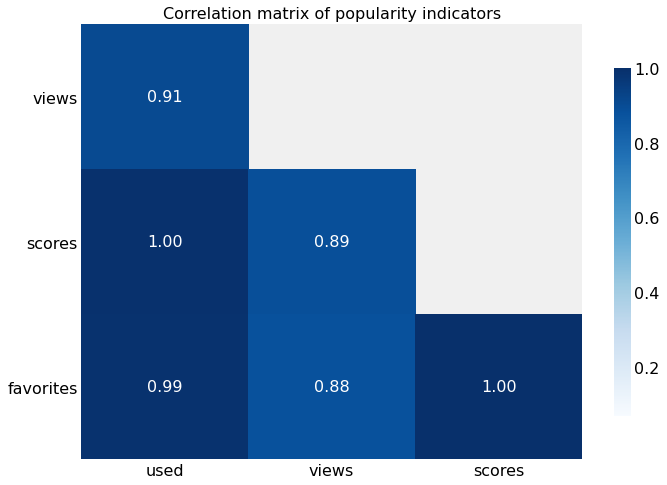

In [17]:
# create correlation matrix
correlations = eval_tags.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# create mask with half of the matrix
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# adjust mask and dataframe deleting the main diagonal row
mask = mask[1:, :-1]
corr = correlations.iloc[1:,:-1].copy()


# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='Blues',
           vmin=0.07, vmax=1, cbar_kws={'shrink': .8})
# rotate yticks
plt.yticks(rotation=0)

# set title
plt.title("Correlation matrix of popularity indicators", fontsize =16)

plt.show()

All of popularity indicators show strong correlation with each other: scores (upvotes-downvotes) correlate strongest to favorites and number of times the tag was used. Number of views correlates less to other indicators but still with significant coefficients (0.88-0.91).

Let's check top tags for every indicator.

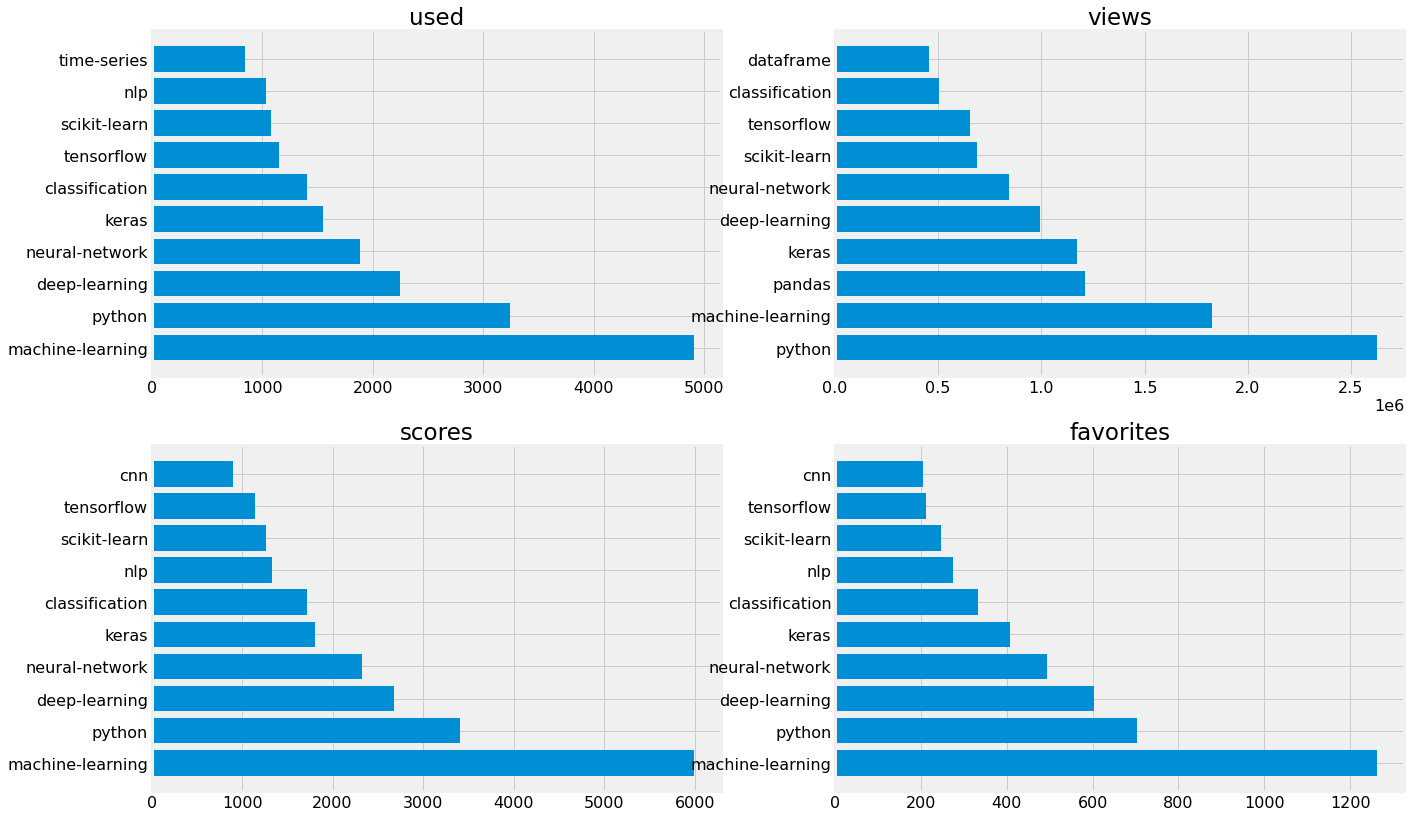

In [18]:
fig = plt.figure(figsize=(20, 14))

# create bar plots for every indicator
for sp in range(4):
    ax = fig.add_subplot(2, 2, sp+1)# setting the grid
    data = eval_tags.sort_values(by=eval_tags.columns[sp], ascending=False)
    data = data.iloc[:10]# select top 10 tags
    col = data.columns[sp]
    index = data.index.to_series()
    ax.barh(index, data[col])
    ax.set_title(col)

Now I have identified top-10 tags for every popularity indicator. Since number of times the tag was used shows strong correlation with it's score and number of times it was added to favourites, further I will use two indicators: 
- used
- viewed

I'd like to figure out which tags are included in lists for both indicators.

In [19]:
# create set of top 10 used
top_10_used = eval_tags.sort_values(by=['used'], ascending=False).head(10).index.to_list()
used_set = set(top_10_used)

In [20]:
# create set of top 10 viewed
top_10_viewed = eval_tags.sort_values(by=['views'], ascending=False).head(10).index.to_list()
viewed_set = set(top_10_viewed)

In [21]:
not_in_viewed = used_set - viewed_set
print(not_in_viewed)

{'nlp', 'time-series'}


In [22]:
not_in_used = viewed_set - used_set
print(not_in_used)

{'pandas', 'dataframe'}


In [23]:
# tags present in both sets
top_tags = list(used_set.intersection(viewed_set))
print(top_tags)

['scikit-learn', 'classification', 'deep-learning', 'neural-network', 'keras', 'machine-learning', 'python', 'tensorflow']


Now it's time to research the most popular tags on Data Science Stack Exchange.

Good starting point is a [Tags](https://datascience.stackexchange.com/tags) page of Data Science StackExchange where I got the following descriptions. 

- *Keras* is an open-source software library that provides a Python interface for [deep learning](https://keras.io/about/). Keras acts as an interface for the TensorFlow library.

- *Scikit-learn* is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. Scikit-learn is one of the most popular machine learning libraries on [GitHub](https://en.wikipedia.org/wiki/Scikit-learn). SciKit learn is used for more general Machine Learning tasks. 

- *Neural-network* or Artificial neural networks (ANN), are composed of 'neurons' - programming constructs that mimic the properties of biological neurons. A set of weighted connections between the neurons allows information to propagate through the network to solve artificial intelligence problems without the network designer having had a model of a real system.

- *Classification* in the [Data Science](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623#:~:text=Classification%20is%20the%20process%20of,discrete%20output%20variables%20(y).) is the process of predicting the class of given data points. Classes are sometimes called targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

- *TensorFlow* is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is typically used more in Deep Learning and Neural Networks.

- *Deep-learning* - a new area of Machine Learning research concerned with the technologies used for learning hierarchical representations of data, mainly done with deep neural networks (i.e. networks with two or more hidden layers), but also with some sort of Probabilistic Graphical Models.

- *Machine Learning* is a subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability. Topics include modeling building, applications, theory, etc.

The most common tags are Python and Machine Learning, other top tags could be roughly divided into 2 groups: 
- deep learning tools like TensorFlow, Keras to work with neural networks
- more common machine learning applications working with structured data (includes classification and Scikit-learn).

Following growing popularity of the **deep-learning** and tools for it I would like to find out which tags are most often associated with.

## Deep learning topics on Data science Stack Exchange

Following [tag info page at Data Science StackExchange](https://datascience.stackexchange.com/tags/deep-learning/info):

Deep Learning is an area of machine-learning which attempts to build neural-networks to learn complex functions by using special architectures composed of many layers (hence the term "deep").
Deep Learning was introduced into machine learning research with the intention of moving machine learning closer to artificial intelligence. A significant impact of deep learning lies in feature learning, mitigating much of the effort going into manual feature engineering in non-deep learning neural networks.

Clearly we have a direction to find what kind of learning content can interest emerging Data Scientists. To learn in detail about topics connected to deep learning, I'll check what tags occur at the same posts as the tag `deep-learning`.

In [24]:
# filter only posts with deep-learning tag
d_l_mask = posts['Tags'].str.contains('deep-learning', regex=False)
d_l_tags = posts.loc[d_l_mask, 'Tags']
d_l_tags.head()

3           [python, deep-learning, convolution, numpy]
23    [machine-learning, deep-learning, predictive-m...
24    [machine-learning, neural-network, deep-learni...
27    [deep-learning, classification, keras, convolu...
39    [deep-learning, computer-vision, image-segment...
Name: Tags, dtype: object

In [25]:
# create list of lists with tags
d_l_list = d_l_tags.to_list()
print(len(d_l_list))

2251


In [26]:
# create frequency dictionary for associated tags
associated_tags = {}
for line in d_l_list:
    for x in line:
        if x in associated_tags:
            associated_tags[x] += 1
        else:
            associated_tags[x] = 1
# sort dictionary by values
tags = sorted(associated_tags.items(), key=lambda x:x[1], reverse=True)[1:21]

# print top 20 associated tags
for x in tags:
    print(x)

('machine-learning', 854)
('neural-network', 585)
('keras', 422)
('tensorflow', 295)
('cnn', 290)
('python', 261)
('lstm', 174)
('nlp', 147)
('classification', 127)
('computer-vision', 113)
('image-classification', 112)
('time-series', 96)
('pytorch', 86)
('convolutional-neural-network', 82)
('rnn', 77)
('convolution', 69)
('reinforcement-learning', 69)
('object-detection', 65)
('loss-function', 62)
('dataset', 59)


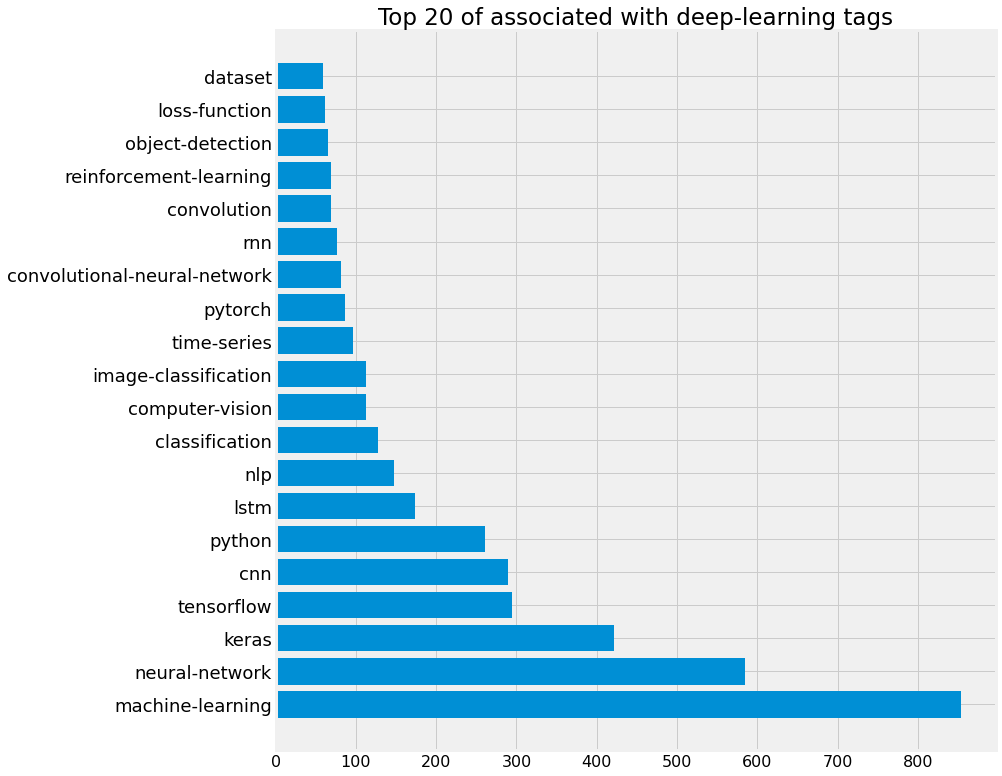

In [27]:
# plot bar chart
fig = plt.figure(figsize = (10,10))

ax = fig.add_axes([0,0,1,1])

count = [val[1] for val in tags]
associated_tags = [val[0] for val in tags]
ax.barh(associated_tags, count)

plt.yticks(fontsize=18)
plt.title('Top 20 of associated with deep-learning tags')

plt.show()

To present the topics of interest in a more visually pleasing way I create a word cloud with them.

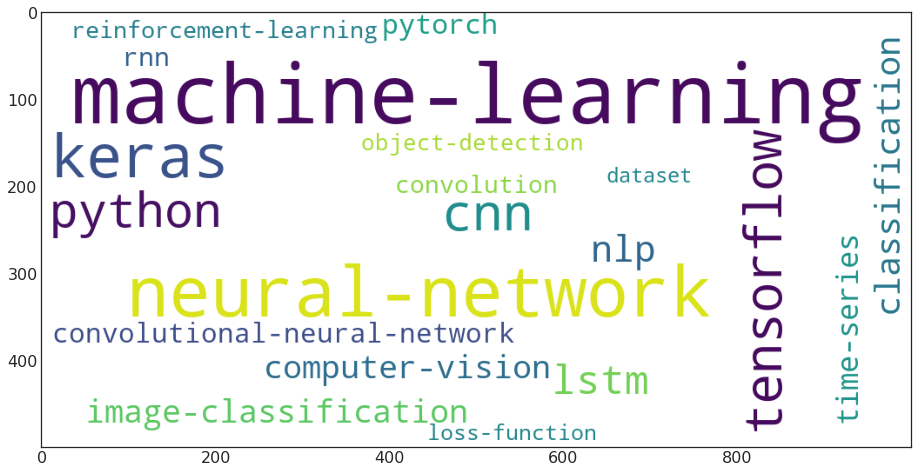

In [28]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(dict(tags))

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)

Top tags associated with deep learning expectedly include a number of tools and neural network architectures. Significant part of them is used primarily for computer vision and natural speech processing.
 
## Is deep learning a hot trend? 

The interest in deep-learning is strong but is that trend long-running?

 
Below I'll track the interest in deep learning on the Data Science Stack Exchange across time. 
I'll use the second csv file `all_questions.csv` uploaded from the Stack Exchange Explorer.

I need to count:
 - how many deep learning questions are asked per time period
 - total amount of questions per time period
 - how many deep learning questions there are relative to the total amount of questions per time period

In [29]:
all_posts = pd.read_csv('all_questions.csv')
all_posts['CreationDate'] = pd.to_datetime(all_posts['CreationDate'])
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28543 entries, 0 to 28542
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            28543 non-null  int64         
 1   CreationDate  28543 non-null  datetime64[ns]
 2   Tags          28543 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 669.1+ KB


In [30]:
# count total number of posts by quarter
all_by_q = all_posts.set_index('CreationDate').groupby(pd.Grouper(freq='Q')).count()
all_by_q.drop(columns=['Tags'], inplace=True)
all_by_q.rename(columns={'Id':'all posts'}, inplace=True)

In [32]:
all_by_q.head()

,all posts
CreationDate,
2014-06-30,157
2014-09-30,188
2014-12-31,214
2015-03-31,188
2015-06-30,284


In [33]:
# create dataframe with posts on deep learning
d_l_mask = all_posts['Tags'].str.contains('deep-learning', regex=False)
d_l = all_posts[d_l_mask]
d_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3803 entries, 9 to 28538
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            3803 non-null   int64         
 1   CreationDate  3803 non-null   datetime64[ns]
 2   Tags          3803 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 118.8+ KB


In [34]:
# create a list with deep-learning associated tags
tags_list = [x[0] for x in tags]
print(tags_list)

['machine-learning', 'neural-network', 'keras', 'tensorflow', 'cnn', 'python', 'lstm', 'nlp', 'classification', 'computer-vision', 'image-classification', 'time-series', 'pytorch', 'convolutional-neural-network', 'rnn', 'convolution', 'reinforcement-learning', 'object-detection', 'loss-function', 'dataset']


In [35]:
# create dataframe with deep learning and associated tags
for i in tags_list:
    mask = all_posts['Tags'].str.contains(i, regex=False)
    df = all_posts[mask]# filter all posts with tag
    all_d_l = pd.concat([d_l,df]).drop_duplicates().reset_index(drop=True)

In [36]:
# check result
all_d_l.head()

,Id,CreationDate,Tags
0,15371,2016-11-27 00:49:00,<machine-learning><deep-learning>
1,39910,2018-10-19 09:44:20,<machine-learning><neural-network><deep-learni...
2,39937,2018-10-19 18:31:23,<deep-learning><nlp><lstm><rnn>
3,39955,2018-10-20 06:59:37,<deep-learning><cnn>
4,39956,2018-10-20 07:23:45,<deep-learning><classification><tensorflow><co...


In [37]:
# count total number of deep learning posts by quarter
d_l_by_q = all_d_l.set_index('CreationDate').groupby(pd.Grouper(freq='Q')).count()
d_l_by_q.drop(columns=['Tags'], inplace=True)
d_l_by_q.rename(columns={'Id':'d_l posts'}, inplace=True)

In [38]:
# create joined dataframe
all_by_q = all_by_q.join(d_l_by_q)
all_by_q.dropna(inplace=True)

In [41]:
all_by_q.head()

,all posts,d_l posts
CreationDate,,
2014-06-30,157,11
2014-09-30,188,19
2014-12-31,214,21
2015-03-31,188,16
2015-06-30,284,28


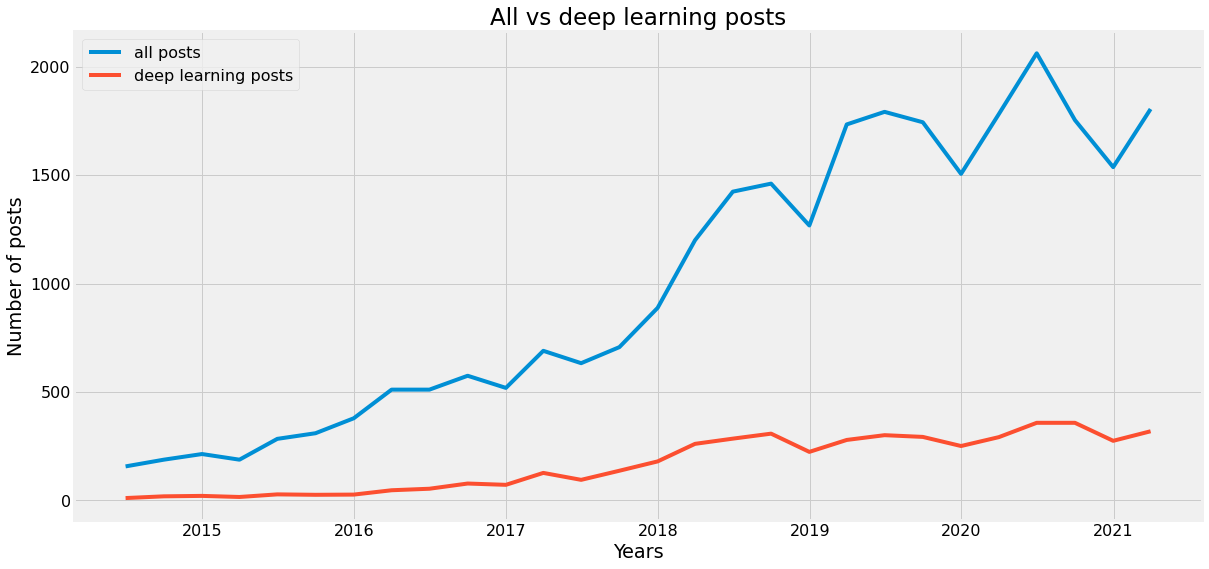

In [45]:
plt.rcParams["figure.figsize"] = (18,9)

plt.plot(all_by_q.iloc[:-1, 0], label = 'all posts')
plt.plot(all_by_q.iloc[:-1, 1], label = 'deep learning posts')
plt.xlabel('Years')
plt.ylabel('Number of posts')
plt.title('All vs deep learning posts')
plt.legend()

plt.show()

In [47]:
# calculate share of deep learning posts from total number of posts
all_by_q['d_l share'] = (all_by_q['d_l posts'] / all_by_q['all posts'])*100

Text(0.5, 1.0, 'Share of deep learning posts')

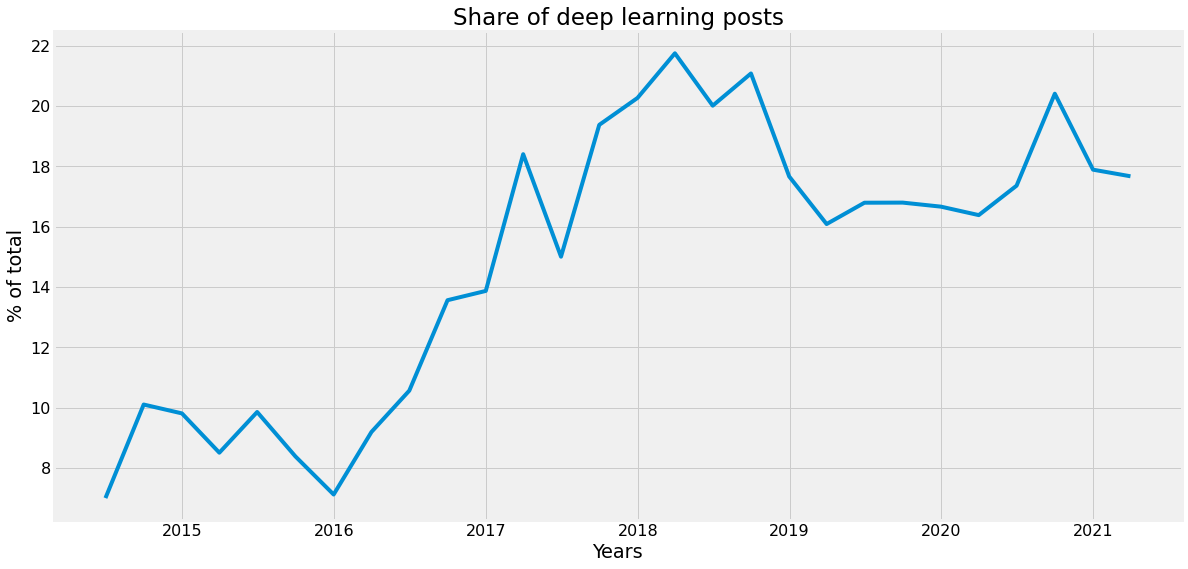

In [49]:
plt.rcParams["figure.figsize"] = (18,9)
plt.plot(all_by_q.iloc[:-1, 2])
plt.xlabel('Years')
plt.ylabel('% of total')
plt.title('Share of deep learning posts')

On the two line charts we clearly see **increase in share of questions connected to deep learning technologies**. The first chart shows that the interest in these topics increases constantly.

## Math Stack Exchange

To be a successful Data Scientist a student should also get profound knowledge of mathematics and statistics.

What chapters are the most popular on the [mathematics community on Stack Exchange](https://math.stackexchange.com/)?

I have downloaded a csv file from the [Stack Exchange Explorer (SEDE)](https://data.stackexchange.com/math/query/new) with the same structure of the SQL query as query 1 in the first chapter of the project. Let's open that file.

In [50]:
math_answers = pd.read_csv('math_recent_questions.csv')
math_answers.head()

,Id,PostTypeId,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,3481728,1,2019-12-19 11:26:00,68,<general-topology><algebraic-topology><coverin...,1,0.0
1,3481729,1,2019-12-19 11:27:23,40,<binomial-theorem><binomial-distribution>,2,NaN
2,3481730,1,2019-12-19 11:27:57,43,<general-topology><topological-vector-spaces>,1,NaN
3,3481733,1,2019-12-19 11:29:47,24,<real-analysis><analysis>,0,NaN
4,3481734,1,2019-12-19 11:31:00,157,<linear-algebra><matrices><spectral-theory><sv...,2,1.0


It has the same structure as the file with recent posts from Data Science Stack Exchange. I will count how many times every tag is used in recent posts on Mathematics Stack Exchange and find top-10 of them.

In [51]:
# count tags
math_answers['Tags'] = math_answers['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')

tags = {}

math_answers['Tags'].apply(count_tags)# function was created before

# find top 10 of tags
math_tags = pd.DataFrame.from_dict(tags, orient='index', columns=['used'])
math_tags = math_tags.sort_values(by = ['used'], ascending=False)
math_tags.head(10)

,used
real-analysis,4788
linear-algebra,3900
calculus,3837
probability,3394
abstract-algebra,2601
integration,2264
sequences-and-series,1992
matrices,1794
combinatorics,1781
functional-analysis,1668


 The first term in the list, 'real analysis', is very common (as python for Data Science Stack Exchange). Most interesting for us are the next 3 terms: linear algebra , calculus , and probability. They are not only very popular on extensively Mathematics Stack Exchange, but are presumed to be tree pillars upon which the machine learning is built (see [The roadmap of Mathematics for Deep Learning](https://towardsdatascience.com/the-roadmap-of-mathematics-for-deep-learning-357b3db8569b)).
These topics could also be included in the programm for our e-learning platform. Next step in further analysis could be more detailed research on mathematics behind deep-learning.
# Final recommendation.
After summing up my observations I recommend to focus our attention on the topics connected to deep learning since this area gains a lot of popularity recently, especially on *natural speech processing and computer vision*.